In [2]:
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [3]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[3]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [15]:
%%time
'''
induce a grammar and train an estimator
'''
from graphlearn.graphlearn import GraphLearnSampler
training_graphs = get_graphs(dataset_fname, size=300)
sampler=GraphLearnSampler(radius_list=[0],thickness_list=[3],
                          min_cip_count=2, min_interface_count=2)
sampler.fit(training_graphs,n_jobs=-1,batch_size=10)

print('graph grammar stats:')
n_instances, n_interfaces, n_cores, n_cips = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances,
                                                                                     n_interfaces,
                                                                                     n_cores,
                                                                                     n_cips))

CPU times: user 5.84 s, sys: 897 ms, total: 6.74 s
Wall time: 10.1 s


interface id: 156234 [5 options]


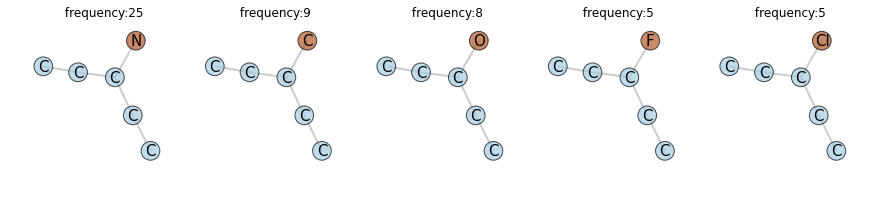

interface id: 877672 [4 options]


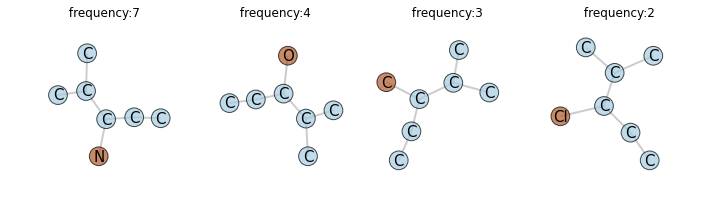

interface id: 467936 [4 options]


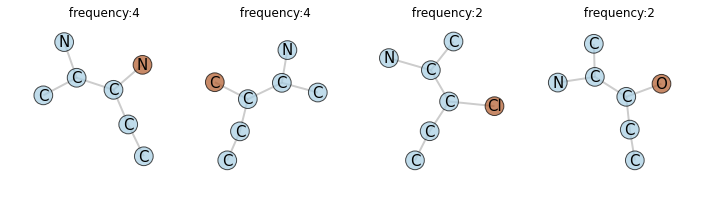

interface id: 786522 [3 options]


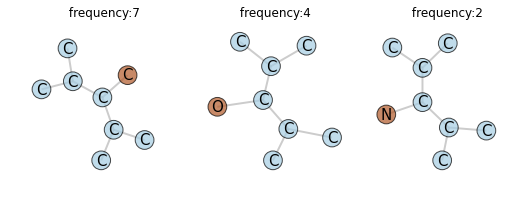

interface id: 620782 [3 options]


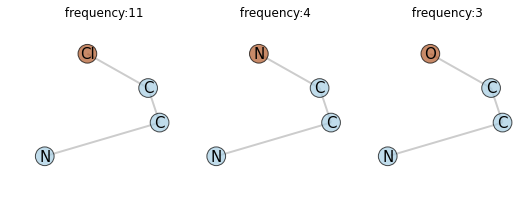

interface id: 557476 [3 options]


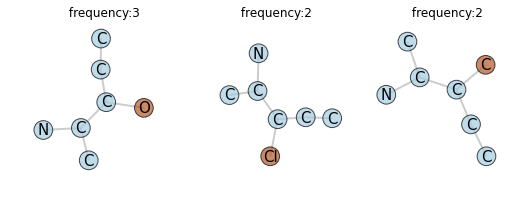

In [17]:
#draw production rules
from graphlearn.utils.draw import draw_grammar
draw_grammar(sampler.grammar().productions, contract=True,
             n_productions=6,n_graphs_per_line=7, 
             size=3, colormap='Paired', node_border=1, vertex_alpha=0.7, edge_alpha=0.2, node_size=350)

how often do we see interface hashes
# productions: 51
x = # interfaces (total: 20)
y=number of cores(ihash), y=sum Of Core Counts(ihash)


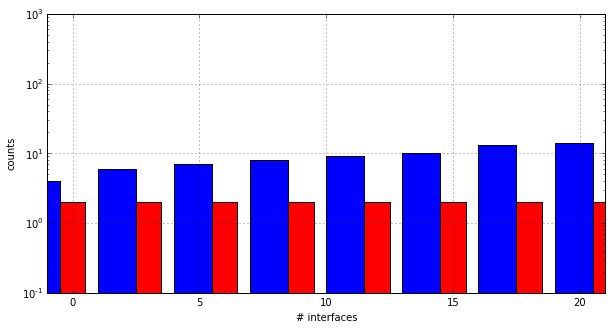

how often was this corehash seen?
x = # cores (total: 7)
y = in Y interfaces(chash), y= sum Of Count Over All Interfaces(chash)


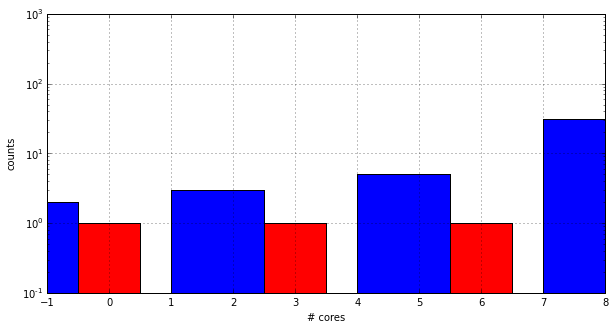

histogram
# productions: 51
distinct cores: 7 (seen on x axis)
interfaces with x many cores were observed y many times. 


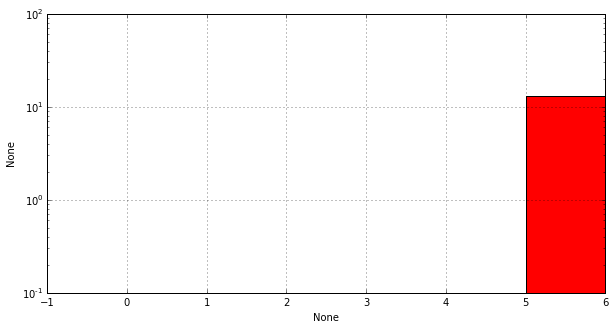

other histogram
how many cores exist with x many interfaces


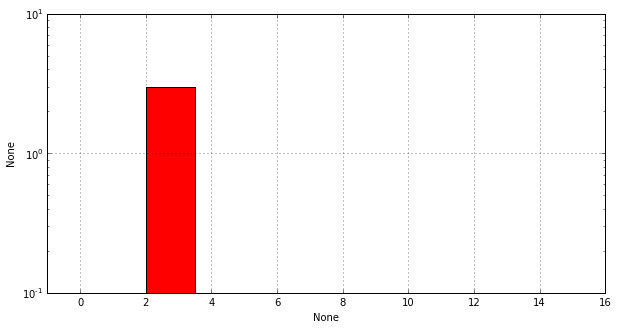

In [18]:
#grammar statistics
from graphlearn.utils.draw import draw_grammar_stats
draw_grammar_stats(sampler.grammar().productions, size=(10,5))

In [11]:
%%time
#analyse grammar size under different parameters
from graphlearn.graphlearn import GraphLearnSampler
from itertools import tee

for radius in range(1,4):
    for thickness in range(1,4):
        print 'Radius: %d   Thickness: %d' % (radius, thickness)
        for size in range(100,1000,100):
            training_graphs = get_graphs(dataset_fname, size=size)
            training_graphs,training_graphs_=tee(training_graphs)

            sampler=GraphLearnSampler(radius_list=[radius],
                                      thickness_list=[thickness],
                                      min_cip_count=2, 
                                      min_interface_count=2,
                                      random_state=42)

            sampler.fit(training_graphs_,n_jobs=-1,batch_size=10)

            n_instances, n_interfaces, n_cores, n_cips = sampler.grammar().size()
            print('#instances: %3d   #interfaces: %4d   #cores: %4d   #core-interface-pairs: %5d' % (n_instances,
                                                                                                 n_interfaces,
                                                                                                 n_cores,
                                                                                                 n_cips))

Radius: 1   Thickness: 1
#instances: 100   #interfaces:   41   #cores:   47   #core-interface-pairs:   170
#instances: 200   #interfaces:   61   #cores:   64   #core-interface-pairs:   285
#instances: 300   #interfaces:   75   #cores:   75   #core-interface-pairs:   352
#instances: 400   #interfaces:   86   #cores:   85   #core-interface-pairs:   428
#instances: 500   #interfaces:  102   #cores:   92   #core-interface-pairs:   508
#instances: 600   #interfaces:  109   #cores:   99   #core-interface-pairs:   571
#instances: 700   #interfaces:  115   #cores:  108   #core-interface-pairs:   621
#instances: 800   #interfaces:  125   #cores:  116   #core-interface-pairs:   681
#instances: 900   #interfaces:  132   #cores:  120   #core-interface-pairs:   725
Radius: 1   Thickness: 2
#instances: 100   #interfaces:   17   #cores:   24   #core-interface-pairs:    50
#instances: 200   #interfaces:   39   #cores:   37   #core-interface-pairs:   117
#instances: 300   #interfaces:   60   #cores:   

.